In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score

In [2]:
#read the data
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
#check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
#Use LabelEncoder to convert the column y into numbers(yes to 1, no to 0)
le = LabelEncoder()
df['y']=le.fit_transform(df['y'])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [5]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

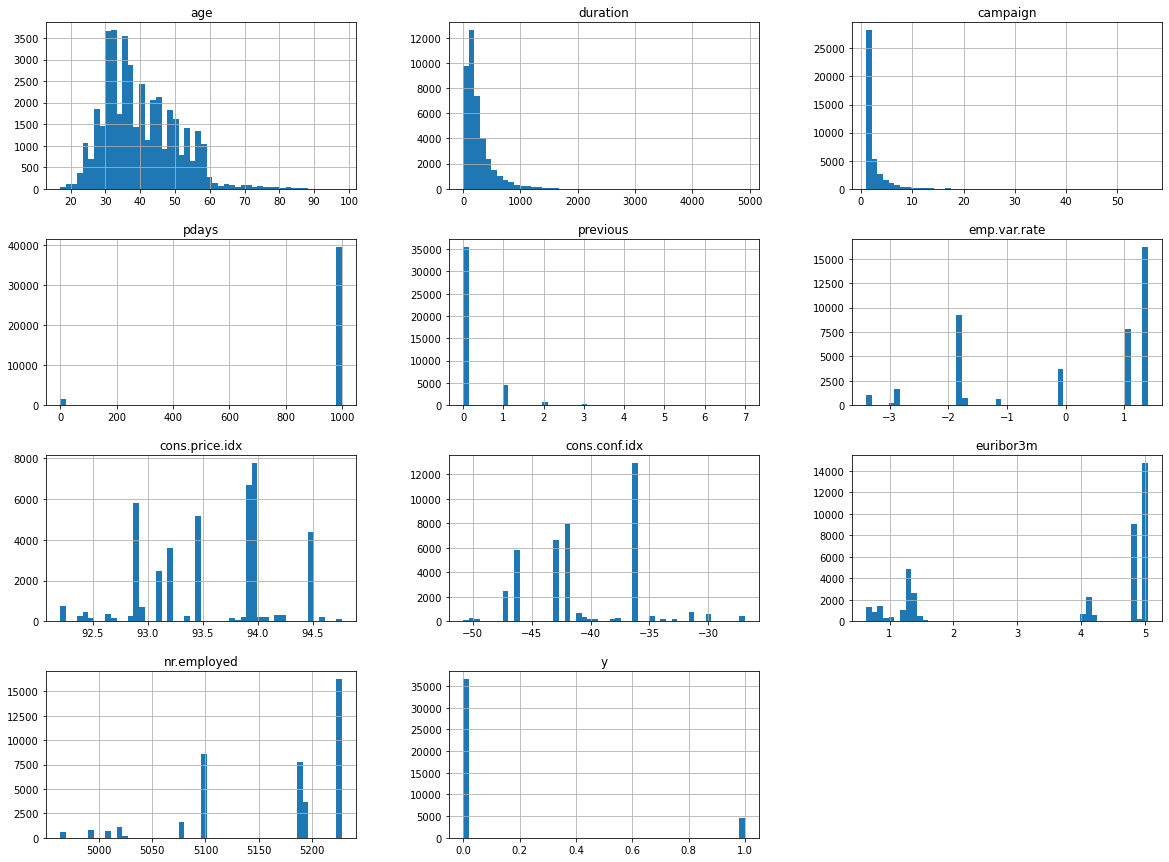

In [6]:
# check the distrubution in the numerical columns
_ = df.hist(bins=50, figsize=(20,15))

In [7]:
#drop the feature cause the data leakage
df = df.drop('duration', axis=1)

In [8]:
# replace unknown to NAN
df = df.replace('unknown', np.nan)
#drop the row which contain the missing data
df = df.dropna()
#reset the index
df = df.reset_index(drop = True)

In [9]:
#transfer the object to number
for i in df.columns.tolist():
    df[i] = df[i].astype('category').cat.codes

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,0,25,0,1,8,18,16,285,8,0
1,20,7,1,3,0,1,0,1,6,1,0,25,0,1,8,18,16,285,8,0
2,23,0,1,1,0,0,0,1,6,1,0,25,0,1,8,18,16,285,8,0
3,39,7,1,3,0,0,1,1,6,1,0,25,0,1,8,18,16,285,8,0
4,42,0,1,5,0,0,0,1,6,1,0,25,0,1,8,18,16,285,8,0


In [10]:
#correlation from data
df.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.005454,-0.401122,-0.129622,0.003172,0.004680,-0.010941,-0.011940,-0.010331,-0.013449,-0.002394,-0.053506,0.049216,0.010767,-0.045738,-0.042451,0.126376,-0.095750,-0.069722,0.048743
job,-0.005454,1.000000,0.019123,0.104364,0.015423,0.005599,-0.018978,-0.029618,-0.036197,-0.002137,-0.007112,-0.020225,0.012920,0.010156,0.000207,-0.018028,0.046818,-0.016201,-0.012952,0.020540
marital,-0.401122,0.019123,1.000000,0.112834,-0.003073,0.008898,0.003601,-0.059260,-0.022090,0.005922,-0.005610,-0.026990,0.028645,0.002132,-0.069576,-0.048480,-0.032153,-0.062353,-0.065725,0.037563
education,-0.129622,0.104364,0.112834,1.000000,0.002447,0.020265,0.009288,-0.095676,-0.090510,-0.014948,0.008478,-0.029968,0.016188,0.023101,0.007969,-0.062519,0.090914,-0.017355,0.000583,0.040804
default,0.003172,0.015423,-0.003073,0.002447,1.000000,-0.004152,-0.004271,-0.006954,-0.005200,0.006985,-0.004342,0.002060,0.002639,-0.006697,0.006897,-0.002413,0.005575,0.006181,0.007776,-0.003776
housing,0.004680,0.005599,0.008898,0.020265,-0.004152,1.000000,0.046994,-0.080567,-0.013312,0.000415,-0.011252,-0.008987,0.021081,-0.013034,-0.054982,-0.075160,-0.031149,-0.039533,-0.035536,0.010071
loan,-0.010941,-0.018978,0.003601,0.009288,-0.004271,0.046994,1.000000,-0.009017,-0.003385,-0.009594,0.006558,0.002875,-0.003506,-0.003767,-0.000738,-0.001436,-0.018302,0.003364,0.004462,-0.005026
contact,-0.011940,-0.029618,-0.059260,-0.095676,-0.006954,-0.080567,-0.009017,1.000000,0.239628,-0.013464,0.079881,0.113088,-0.201760,0.106626,0.340716,0.555300,0.218300,0.259762,0.174047,-0.143859
month,-0.010331,-0.036197,-0.022090,-0.090510,-0.005200,-0.013312,-0.003385,0.239628,1.000000,0.023880,-0.067766,-0.045634,0.104798,-0.069068,-0.187023,-0.021847,-0.041231,-0.197775,-0.253319,-0.003915
day_of_week,-0.013449,-0.002137,0.005922,-0.014948,0.006985,0.000415,-0.009594,-0.013464,0.023880,1.000000,-0.039884,-0.008246,-0.004170,0.016699,0.038252,0.002668,0.028885,0.026825,0.028756,0.020523


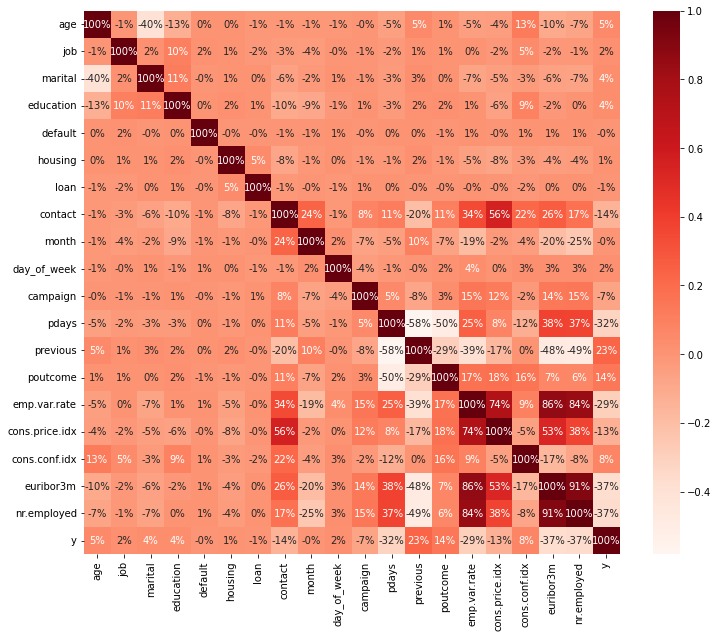

In [11]:
#visualize the correlation
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds,fmt=".0%")
plt.show()

In [12]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
 
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

In [15]:
#set train set
# drop target
x_dummies =  pd.get_dummies(df.drop('y', axis = 1)).values
select_dummies = pd.get_dummies(df[["age","job","marital","housing","day_of_week","euribor3m","nr.employed","campaign","emp.var.rate"]])

#select the target
target = df['y']

In [14]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [16]:
clf = RandomForestClassifier()
ros = RandomOverSampler()
#x, y = ros.fit_resample(x_dummies, target)
x1, y1 = ros.fit_resample(select_dummies, target)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=50,stratify=y1) 
#check
print(" x_train:",len(x_train),'\n',"x_test:",len(x_test),'\n',"y_train:",len(y_train),'\n',"y_test:",len(y_test))

 x_train: 42606 
 x_test: 10652 
 y_train: 42606 
 y_test: 10652


In [18]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
test_predictions = clf.predict(x_test)

In [20]:
f1score = f1_score(y_test, test_predictions)

In [21]:
f1score

0.9489795918367346